In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:\\ML\\csv\\Employee.csv")

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.shape

(4653, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
df.duplicated().sum()

1889

In [7]:
df.isnull().sum().sort_values(ascending=False)

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   object
 1   JoiningYear                2764 non-null   int64 
 2   City                       2764 non-null   object
 3   PaymentTier                2764 non-null   int64 
 4   Age                        2764 non-null   int64 
 5   Gender                     2764 non-null   object
 6   EverBenched                2764 non-null   object
 7   ExperienceInCurrentDomain  2764 non-null   int64 
 8   LeaveOrNot                 2764 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 194.5+ KB


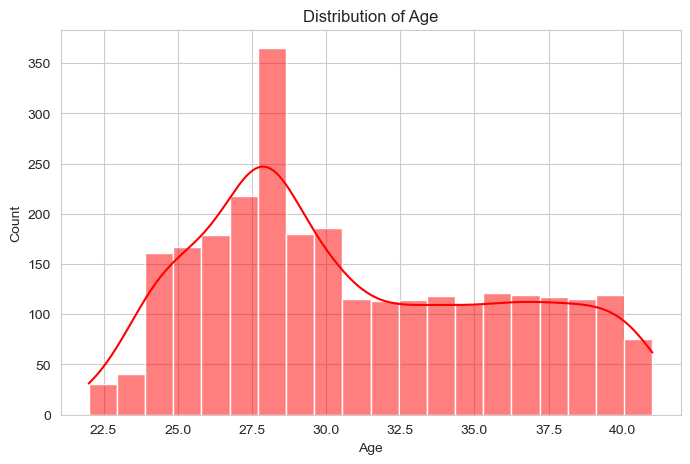

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True, color='red')
plt.title("Distribution of Age")
plt.show()

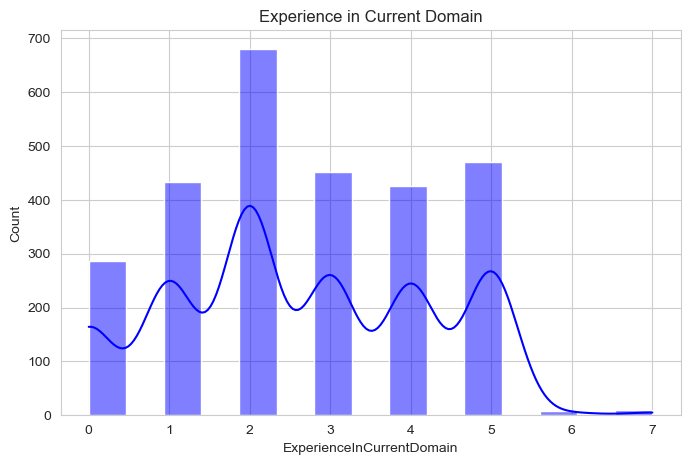

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df["ExperienceInCurrentDomain"], bins=15, kde=True, color='blue')
plt.title("Experience in Current Domain")
plt.show()

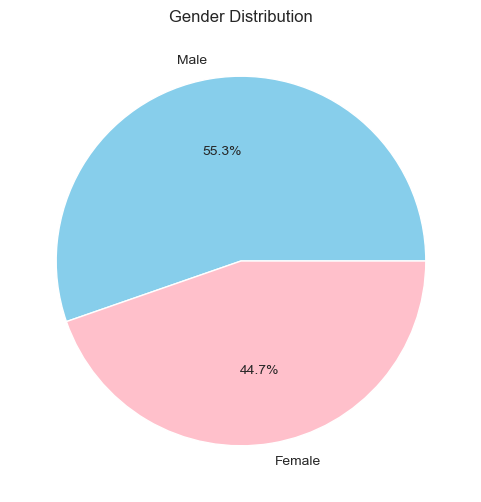

In [12]:
plt.figure(figsize=(6, 6))
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=['skyblue', 'pink'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

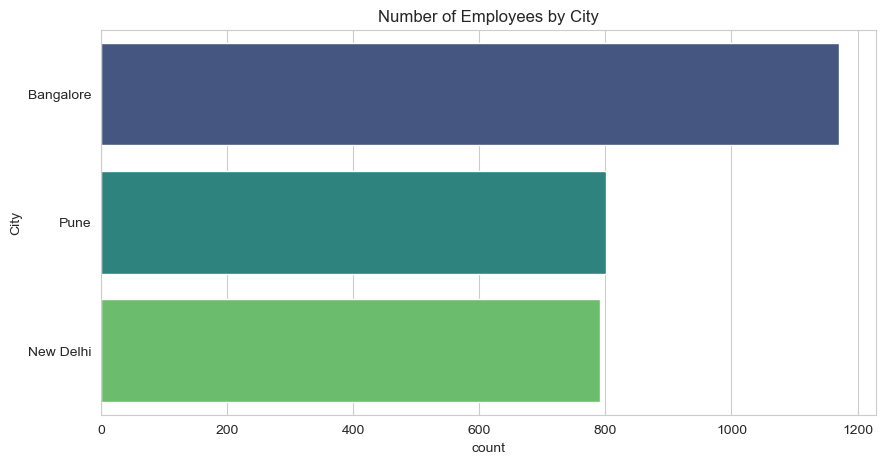

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["City"], order=df["City"].value_counts().index, hue=df["City"], palette='viridis', legend=False)
plt.title("Number of Employees by City")
plt.show()

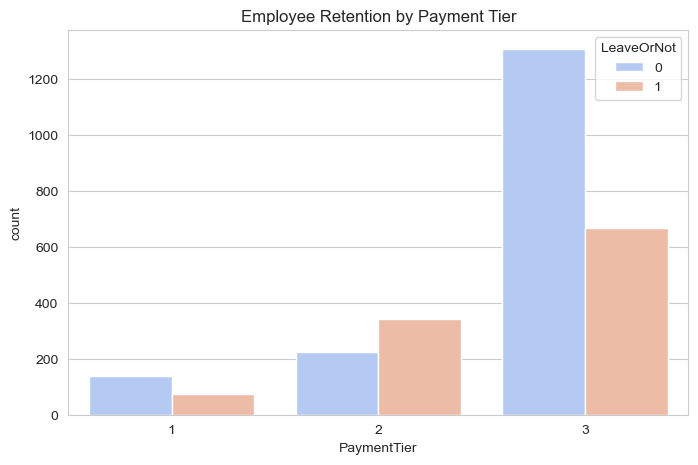

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x="PaymentTier", hue="LeaveOrNot", data=df, palette='coolwarm')
plt.title("Employee Retention by Payment Tier")
plt.show()

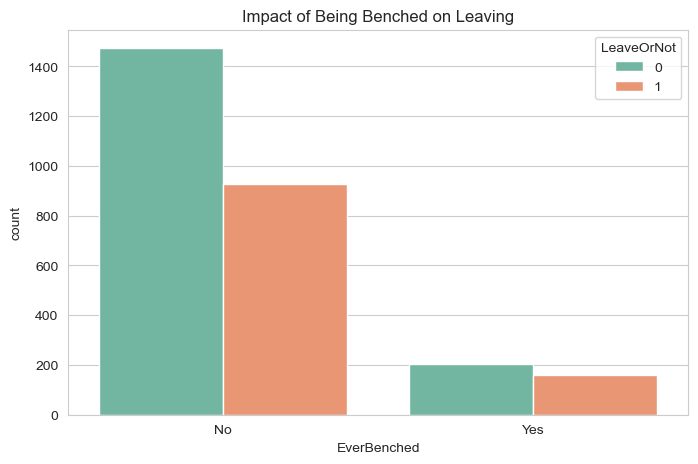

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x="EverBenched", hue="LeaveOrNot", data=df, palette='Set2')
plt.title("Impact of Being Benched on Leaving")
plt.show()

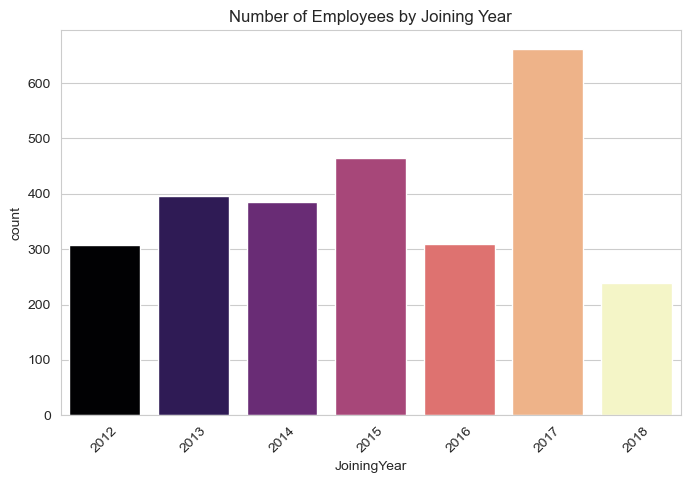

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x="JoiningYear", hue="JoiningYear", data=df, palette='magma', legend=False)
plt.xticks(rotation=45)
plt.title("Number of Employees by Joining Year")
plt.show()

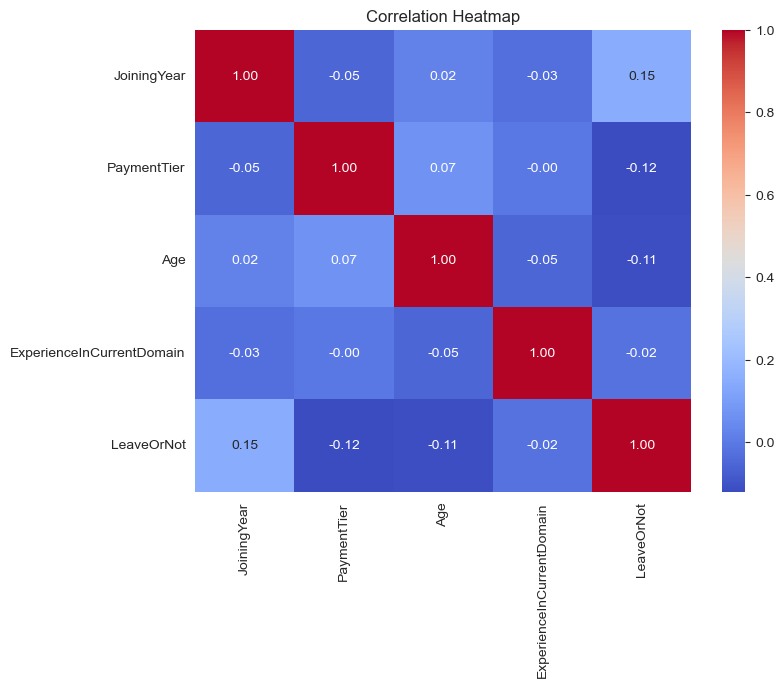

In [17]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=["number"]) 
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
cols=df.select_dtypes('object')

In [19]:
for col in cols.columns:
    print(f'number of column {col} is :',df[col].nunique())
    print(f'number of column {col} is :',df[col].unique())

number of column Education is : 3
number of column Education is : ['Bachelors' 'Masters' 'PHD']
number of column City is : 3
number of column City is : ['Bangalore' 'Pune' 'New Delhi']
number of column Gender is : 2
number of column Gender is : ['Male' 'Female']
number of column EverBenched is : 2
number of column EverBenched is : ['No' 'Yes']


In [20]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [21]:
label=LabelEncoder()
df['EverBenched']=label.fit_transform(df['EverBenched'])
df['Gender']=label.fit_transform(df['Gender'])
df['JoiningYear']=label.fit_transform(df['JoiningYear'])

In [22]:
cols=df.select_dtypes('object')

In [23]:
for c in list(cols.columns) :
    onehotencoder=OneHotEncoder()
    X = onehotencoder.fit_transform(np.array(df[c]).reshape(-1,1)).toarray()
    for i,col in enumerate(onehotencoder.categories_[0]) :
        df[col] = X[:,i]

In [24]:
df.drop(list(cols.columns),axis =1,inplace = True)

In [25]:
df.head()

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,New Delhi,Pune
0,5,3,34,1,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,28,0,0,3,1,1.0,0.0,0.0,0.0,0.0,1.0
2,2,3,38,0,0,2,0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,3,27,1,0,5,1,0.0,1.0,0.0,1.0,0.0,0.0
4,5,3,24,1,1,2,1,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   JoiningYear                2764 non-null   int64  
 1   PaymentTier                2764 non-null   int64  
 2   Age                        2764 non-null   int64  
 3   Gender                     2764 non-null   int32  
 4   EverBenched                2764 non-null   int32  
 5   ExperienceInCurrentDomain  2764 non-null   int64  
 6   LeaveOrNot                 2764 non-null   int64  
 7   Bachelors                  2764 non-null   float64
 8   Masters                    2764 non-null   float64
 9   PHD                        2764 non-null   float64
 10  Bangalore                  2764 non-null   float64
 11  New Delhi                  2764 non-null   float64
 12  Pune                       2764 non-null   float64
dtypes: float64(6), int32(2), int64(5)
memory usage: 

In [27]:
x=df.drop(['LeaveOrNot'],axis=1)

In [28]:
y=df['LeaveOrNot']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: int64

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
scaler = RobustScaler() 
X_scaler = scaler.fit_transform(x)

In [31]:
X_scaler

array([[ 0.5  ,  0.   ,  0.5  , ...,  1.   ,  0.   ,  0.   ],
       [-0.5  , -2.   , -0.25 , ...,  0.   ,  0.   ,  1.   ],
       [-0.25 ,  0.   ,  1.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [-0.5  , -1.   ,  0.875, ...,  0.   ,  0.   ,  1.   ],
       [ 0.75 ,  0.   , -0.375, ...,  0.   ,  1.   ,  0.   ],
       [-0.75 ,  0.   ,  0.   , ...,  1.   ,  0.   ,  0.   ]])

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.2,random_state=0)
X_train.shape ,y_train.shape

((2211, 12), (2211,))

In [33]:
X_test.shape ,y_test.shape

((553, 12), (553,))

In [34]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from tqdm import tqdm

In [35]:
Models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SGDClassifier': SGDClassifier(loss='log_loss', max_iter=1000),
    'GaussianNB':GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=10),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoostClassifier': AdaBoostClassifier(n_estimators=50, random_state=42),
    'SVC': SVC(kernel='rbf', C=1, random_state=42)
    
}

In [36]:
ModelName = []
ModelAccuracy = []
for nameModel, model in tqdm(Models.items()):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    ModelName.append(nameModel)
    ModelAccuracy.append([
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred,zero_division=1),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        model.score(X_train, y_train)
        
    ])
Model_accuracy = pd.DataFrame(ModelAccuracy, index=ModelName, columns=['Accuracy', 'Precision', 'Recall', 'F1 Score','score_train'])

Model_accuracy

 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:00<00:00,  9.80it/s]C:\Users\Ahmed\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  8.06it/s]


,Accuracy,Precision,Recall,F1 Score,score_train
LogisticRegression,0.674503,0.625806,0.442922,0.518717,0.682497
SGDClassifier,0.629295,0.551471,0.342466,0.422535,0.619629
GaussianNB,0.650995,0.557018,0.579909,0.568233,0.668928
KNeighborsClassifier,0.766727,0.835821,0.511416,0.634561,0.777476
DecisionTreeClassifier,0.701627,0.627358,0.607306,0.617169,0.930348
RandomForestClassifier,0.732369,0.683938,0.602740,0.640777,0.929896
GradientBoostingClassifier,0.792043,0.846667,0.579909,0.688347,0.824514
AdaBoostClassifier,0.746835,0.776224,0.506849,0.613260,0.767526
SVC,0.781193,0.840278,0.552511,0.666667,0.801900


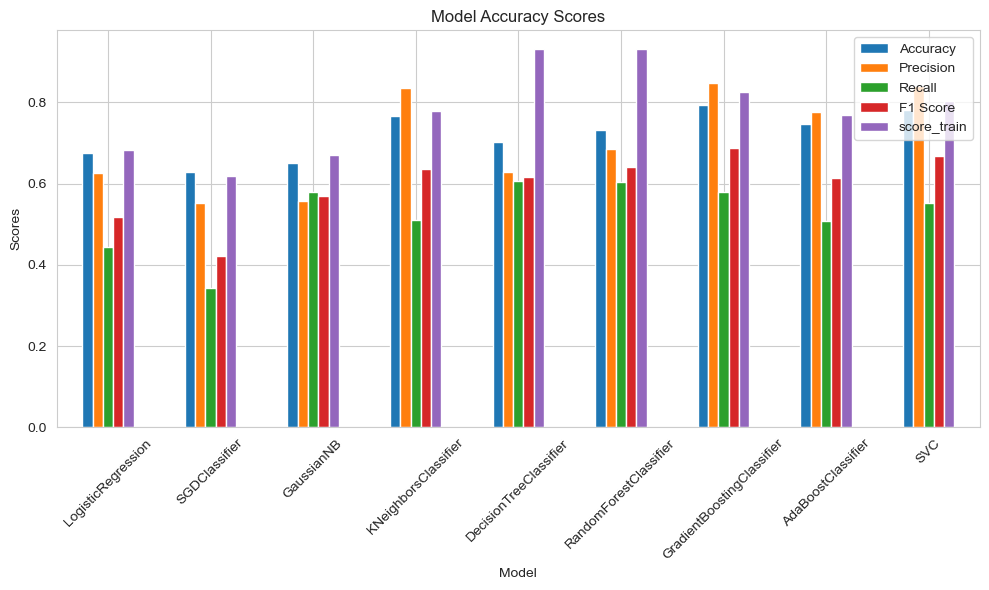

In [37]:
Model_accuracy.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Model')  
plt.ylabel('Scores')  
plt.title('Model Accuracy Scores')  
plt.xticks(rotation=45)  
plt.legend(loc='upper right') 
plt.tight_layout()  
plt.show()

In [38]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[311,  98],
       [ 23, 121]], dtype=int64)

<Axes: >

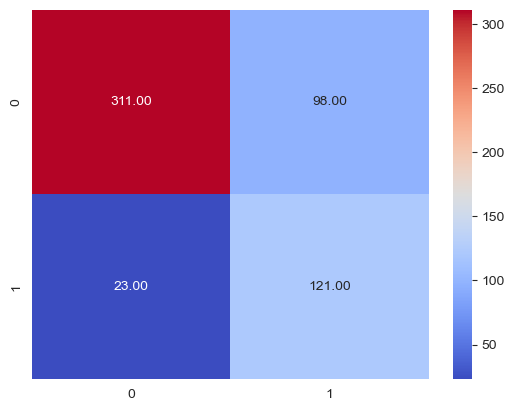

In [39]:
import seaborn as sns
sns.heatmap(cm,  annot=True, fmt=".2f" ,cmap="coolwarm")

In [40]:
print(y_pred[:5].tolist())

[0, 0, 0, 1, 0]


In [41]:
print(y_test[:5].tolist())

[0, 0, 0, 1, 1]


In [84]:
best_model = GradientBoostingClassifier()
best_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [86]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of GradientBoostingClassifier: {accuracy:.6f}")

Accuracy of GradientBoostingClassifier: 0.792043


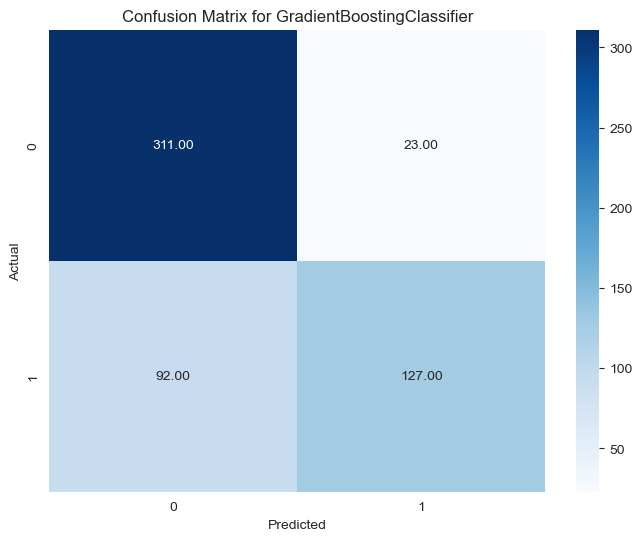

In [88]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.title('Confusion Matrix for GradientBoostingClassifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()